Epoch 0: loss = 0.8887629508972168
Epoch 50: loss = 0.7752925157546997
Epoch 100: loss = 0.7035173773765564
Epoch 150: loss = 0.6578326225280762
Epoch 200: loss = 0.6286298036575317
Epoch 250: loss = 0.6099019050598145
Epoch 300: loss = 0.5978575944900513
Final loss: 0.5976665616035461
Accuracy: 0.78


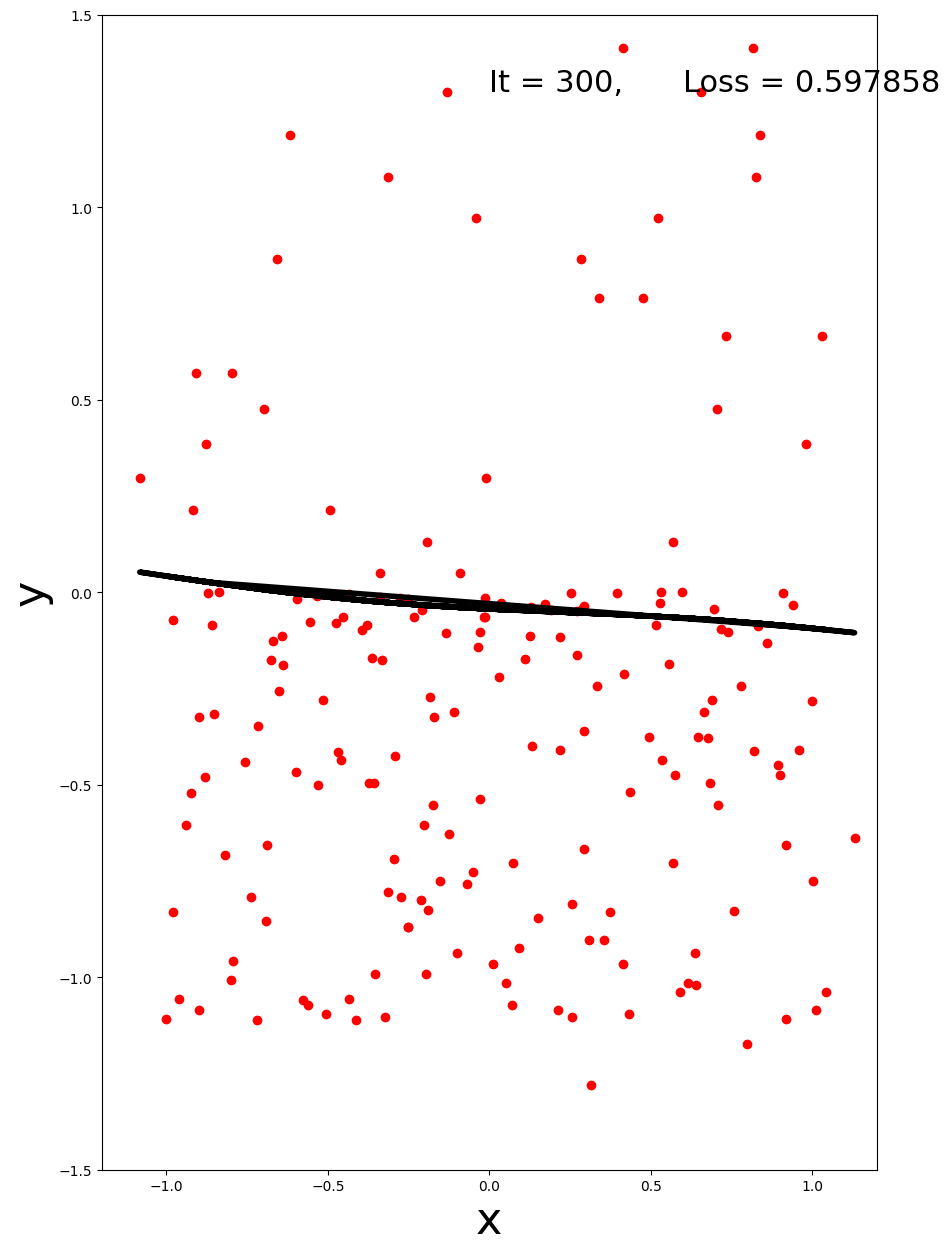

In [62]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import imageio
import sys

# Define the positive examples
x_pos = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y_pos = x_pos ** 2
m=y_pos.mean()
s=y_pos.std()
y_pos=(y_pos-m)/s

# Define the negative examples (corrupted x values)
x_neg = x_pos + 0.1 * torch.randn(x_pos.size())
y_neg = -x_neg ** 2

# Concatenate the positive and negative examples
x = torch.cat([x_pos, x_neg], dim=0)
y = torch.cat([y_pos, y_neg], dim=0)
idx=np.arange(200)
np.random.shuffle(idx)
y=y[idx]

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the network
net = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

fig, ax = plt.subplots(figsize=(10, 15))

# Train the network
for epoch in range(300 + 1):
    # Forward pass
    output = net(x)
    y_pred = output

    # Compute the loss
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: loss = {loss.item()}")

    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y', fontsize=32)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.5, 1.5)
    ax.scatter(x, y, color="red")
    ax.plot(x, y_pred.data.numpy(), 'k-', lw=4)
    ax.text(0, 1.3, 'It = %d,' % epoch, fontdict={'size': 22, 'color': 'black'})
    ax.text(0.6, 1.3, 'Loss = %.6f' % loss.data.numpy(), fontdict={'size': 22, 'color': 'black'})

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

# Evaluate the network
with torch.no_grad():
    output = net(x)
    loss = criterion(output, y)
    print(f"Final loss: {loss.item()}")
    predicted = output > 0.8
    accuracy = (predicted == y.byte()).sum().item() / len(y)
    print(f"Accuracy: {accuracy}")

In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Create a dataset of x and y values
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x ** 2

# Introducing a new feature z=sqrt(y)
z = np.sqrt(y)

softplus = nn.Softplus()
# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,1)

    def forward(self, x):
        x = softplus(self.fc1(x))
        return x

# Create an instance of the network
net = Net()

# Define the loss function and optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(300 + 1):
    # Forward pass
    output = net(x)
    z_pred = output

    # Compute the loss
    loss = criterion(z_pred, z)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: loss = {loss.item()}")

# Convert predictions of z to predictions of y
y_pred = z_pred ** 2

# Evaluate the network
with torch.no_grad():
    output = net(x)
    loss = criterion(output, z)
    print(f"Final loss: {loss.item()}")
    predicted = output > 0.8
    accuracy = (predicted == z.byte()).sum().item() / len(z)
    print(f"Accuracy: {accuracy}")


# Print the predictions
# print("Predictions of z:", z_pred)
# print("Predictions of y:", y_pred)

Epoch 0: loss = 0.39596134424209595
Epoch 50: loss = 0.37292835116386414
Epoch 100: loss = 0.3545398712158203
Epoch 150: loss = 0.3391888737678528
Epoch 200: loss = 0.32614678144454956
Epoch 250: loss = 0.314959317445755
Epoch 300: loss = 0.3053959012031555
Final loss: 0.3052248954772949
Accuracy: 0.98


Epoch 0: loss = 0.6015189290046692
Epoch 100: loss = 0.505454421043396
Epoch 200: loss = 0.4528326094150543
Epoch 300: loss = 0.41556698083877563
Epoch 400: loss = 0.3810722231864929
Epoch 500: loss = 0.34995731711387634
Epoch 600: loss = 0.32470306754112244
Epoch 700: loss = 0.30481666326522827
Epoch 800: loss = 0.2895393669605255
Epoch 900: loss = 0.2780672013759613
tensor(0.4948)
tensor(1.1749)


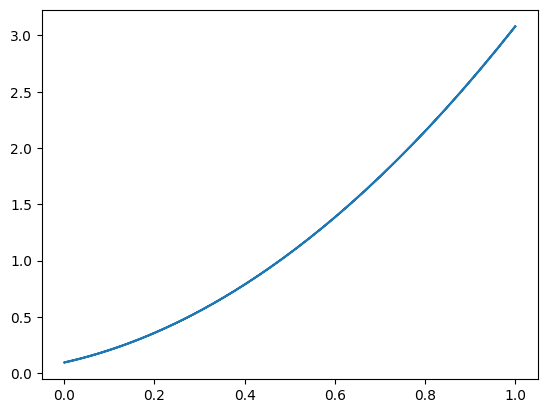

In [61]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Create a dataset of x and y values
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y_pos = x ** 2
y_neg = -x ** 2

# Combine the positive and negative data into one dataset
x_combined = torch.cat([x, x])
y_combined = torch.cat([y_pos, y_neg])

# Introducing a new feature z=sqrt(y)
z = torch.sqrt(torch.abs(y_combined))

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.cat([x ** 2, -x ** 2], dim=1)
        x = self.fc1(x)
        return x

# Create an instance of the network
net = Net()

# Define the loss function and optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the network
for epoch in range(1000):
    # Forward pass
    output = torch.reshape(net(x), (1, 100))

    # Compute the loss
    loss = criterion(output, z)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss = {loss.item()}")

# Make predictions for z for new values of x
x_new = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)
with torch.no_grad():
    output = net(x_new)
    z_pred = output

# Convert predictions of z to predictions of y
y_pred = torch.where(z_pred > 0, z_pred ** 2, -z_pred ** 2)

#Computing error between predicted value of y and that of true value of y
pos_estimation_loss = criterion(y_pred,y_pos)
print(pos_estimation_loss)
neg_estimation_loss = criterion(y_pred,y_neg)
print(neg_estimation_loss)

#If our technique is correct, y_pred and y_pos should return a straigt line graph
plt.plot(y_pos,y_pred)
# plt.plot(y_pred,y_neg)
plt.show()

If we sort of have a loop inside training of z such that it keeps predicting y and using the difference between y_pred and y_pos, it again updates its weights and re-train itself until this distance is minimized or the graph between y_pred and y_pos is straight line.